In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train_comments.csv')
test_df = pd.read_csv('test_comments.csv')

In [3]:
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [6]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [8]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [9]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64


In [10]:
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

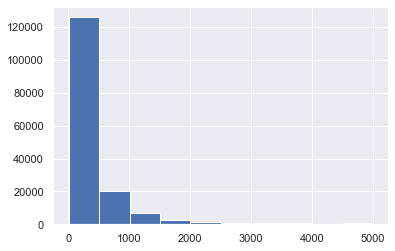

In [11]:
sns.set()
train_df['char_length'].hist()
plt.show()
#Most text are within 500 characters

In [12]:
data = train_df[cols_target]

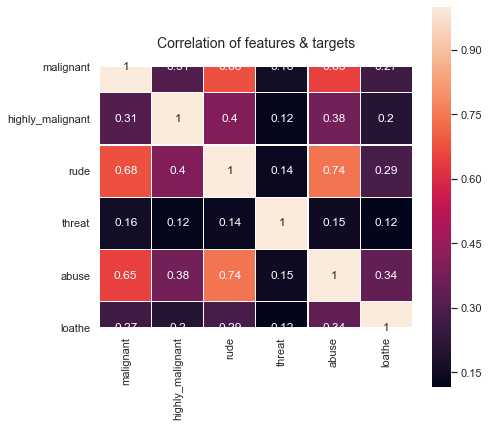

In [13]:
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,
           linecolor='white',annot=True)

In [14]:
#test data character lengths
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

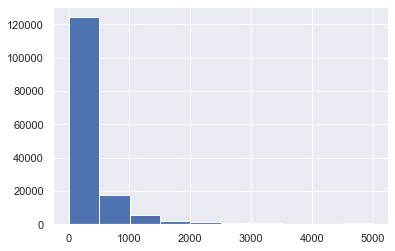

In [15]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [16]:
#clean comment text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [17]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [18]:
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [21]:
from wordcloud import WordCloud,STOPWORDS

def showWordCloud(df, label):
    plt.figure(figsize=(12,10))
    text = df[df[label]==1]["comment_text"].tolist()
    label_img = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=800,
                          height=600,
                         ).generate(" ".join(text))
    plt.title(label,fontsize=40)
    plt.imshow(label_img)

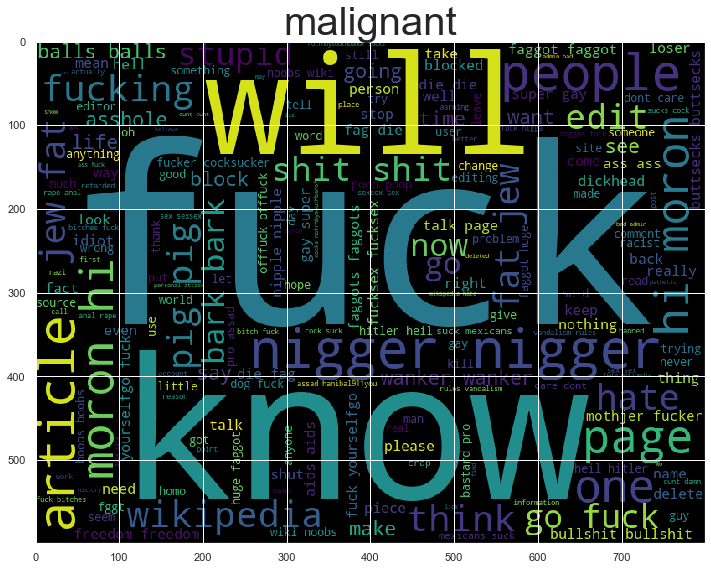

In [22]:
showWordCloud(train_df, "malignant")

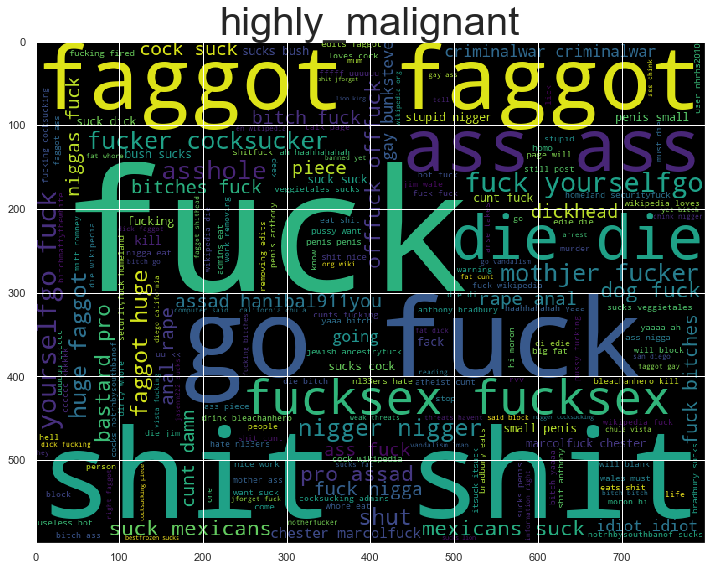

In [23]:
showWordCloud(train_df, "highly_malignant")

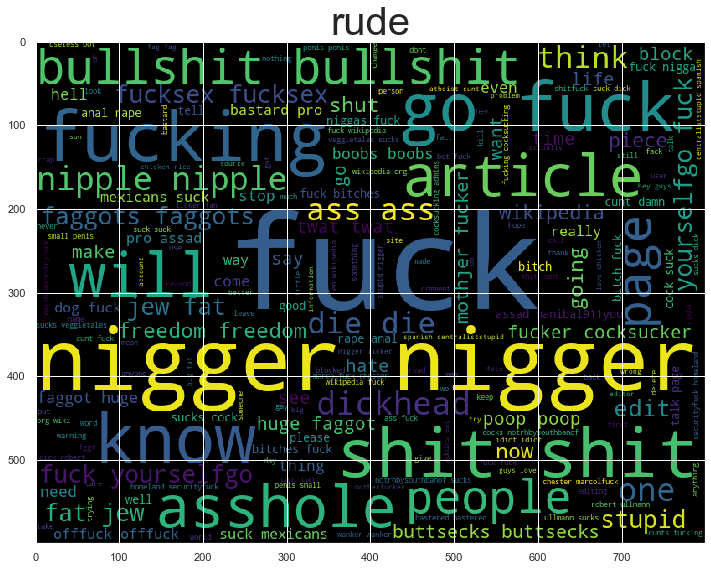

In [24]:
showWordCloud(train_df, "rude")

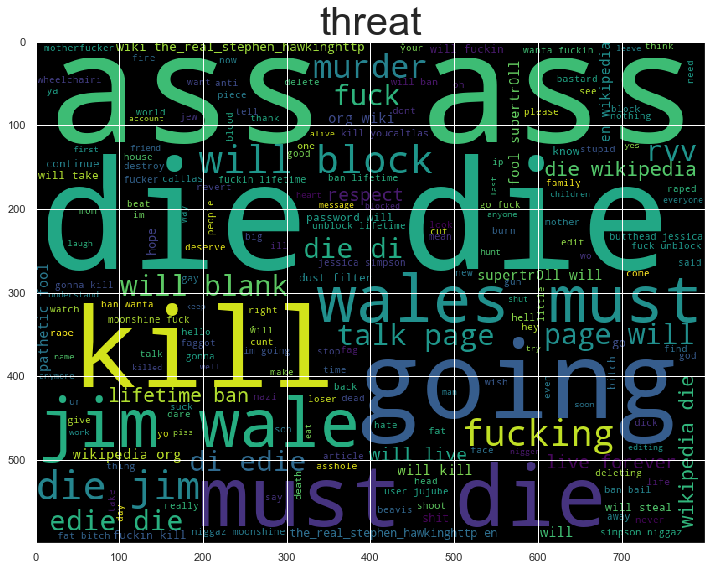

In [25]:
showWordCloud(train_df, "threat")

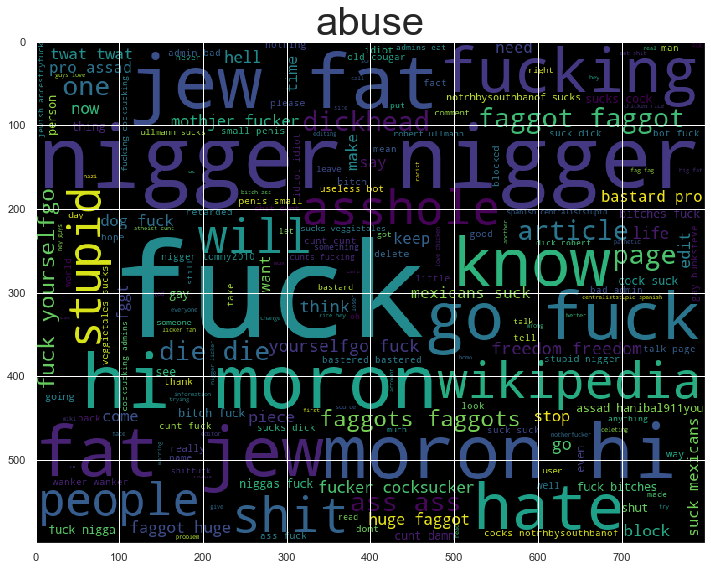

In [26]:
showWordCloud(train_df, "abuse")

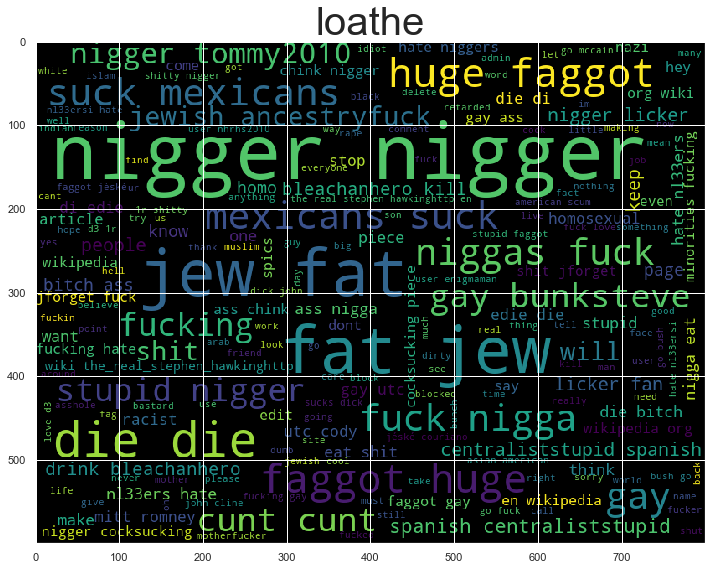

In [27]:
showWordCloud(train_df, "loathe")

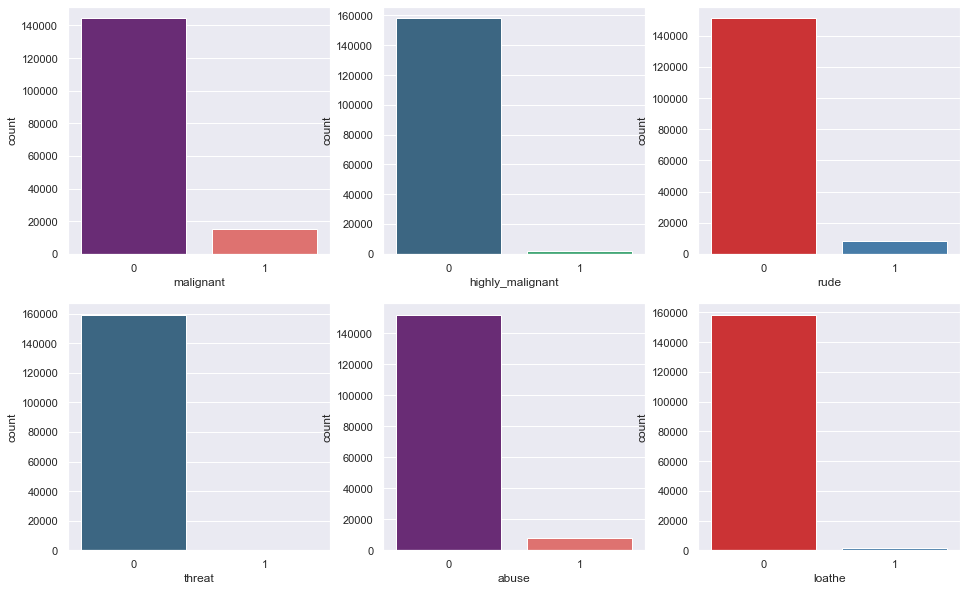

In [28]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train_df['malignant'],palette= 'magma',ax=ax1)
sns.countplot(train_df['highly_malignant'], palette= 'viridis',ax=ax2)
sns.countplot(train_df['rude'], palette= 'Set1',ax=ax3)
sns.countplot(train_df['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train_df['abuse'], palette = 'magma',ax=ax5)
sns.countplot(train_df['loathe'], palette = 'Set1', ax = ax6)

In [29]:
unlabelled_in_all = train_df[(train_df['malignant']!=1) & (train_df['highly_malignant']!=1) & (train_df['rude']!=1) & 
                            (train_df['threat']!=1) & (train_df['abuse']!=1) & (train_df['loathe']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [30]:
train_df = train_df.drop('char_length',axis=1)

In [31]:
X = train_df.comment_text
test_X = test_df.comment_text

In [32]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [34]:
X_dtm = vect.fit_transform(X)
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178453 stored elements in Compressed Sparse Row format>

In [35]:
test_X_dtm = vect.transform(test_X)
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618912 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

In [46]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    logreg.fit(X_dtm, y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]

... Processing malignant
Training accuracy is 1.0
... Processing highly_malignant
Training accuracy is 1.0
... Processing rude
Training accuracy is 1.0
... Processing threat
Training accuracy is 1.0
... Processing abuse
Training accuracy is 1.0
... Processing loathe
Training accuracy is 1.0


In [40]:
def add_feature(X, feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [42]:
for label in cols_target:
    print('Processing {}'.format(label))
    y = train_df[label]
    logreg.fit(X_dtm,y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

Processing malignant
Training Accuracy is 0.9596919239711477
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
Processing highly_malignant
Training Accuracy is 0.9909758038741375
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
Processing rude
Training Accuracy is 0.9825406872176022
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
Processing threat
Training Accuracy is 0.9974055436138145
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
Processing abuse
Training Accuracy is 0.9796579578996184
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
Processing loathe
Training Accuracy is 0.9938585331921214
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)
